# Supplemental Figure S2

Here we show the time it takes to run our method as a function of the number of paths in the ARG. We compare it to two other methods. One using the `networkx` package and the other is our method but using the Full Paths matrix as opposed to the Minimal Path Matrix

# Data File Generation Instructions

1. First, we ran the `benchmark.py` for different parameter values on the cluster using the bash script `MetaFile.sh`. Note that to run `benchmark.py` you need the algos folder in the same directory as `benchmark.py`
2. The output are several .csv files (one for each combination of parameter values). These .csv files were stored in the DataFiles Folder and the following code run to generate the `benchmarking_compiled.csv` file which is used to make the plot

In [4]:
import numpy as np 

benchmark_file = open("./DataFiles/benchmarking_compiled.csv", "w")
samples = ['10', '40', '70', '100', '150', '200', '250','300','350', '400','450','500','700','1000','4000','7000']
seq_lens = ['1000', '3000', '5000']
repeats = ['0', '1' ,'2']

for sample in samples: 
    sample = float(sample)
    for seq_len in seq_lens:
        seq_len = float(seq_len)
        for repeat in repeats: 
            repeat = float(repeat)
            try:
                file = open("./DataFiles/benchmarking_" + str(sample) + "_" + str(seq_len) + "_" + str(repeat) + ".csv")
            except:
                continue 
            try:
                lines = file.readlines()
                if len(lines) == 1:
                    continue
                else :
                    benchmark_file.write(lines[1])
                    continue
            except: 
                continue
benchmark_file.close()   
            

# Code to generate the Plot

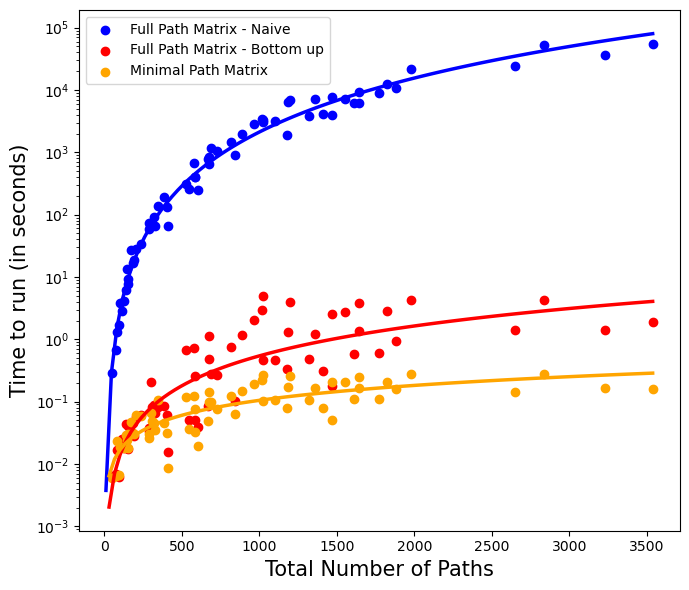

In [5]:
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

plt.figure(figsize = (7,6))
#bench = np.loadtxt("./DataFiles/benchmarking.csv", delimiter=",", skiprows=1)
bench_new = np.loadtxt("./DataFiles/benchmarking_compiled.csv", delimiter=",", skiprows=1)
max_paths = max( list(bench_new[:,5]))

plt.scatter(list(bench_new[:,5]), list(bench_new[:,7]), label="Full Path Matrix - Naive", color = 'blue');
p = np.polyfit(np.log(list(bench_new[:,5])),np.log(list(bench_new[:,7])), deg=1)
p = np.poly1d(p);
xseq = np.linspace(10, max_paths, num=100);
plt.plot(xseq, np.exp(p(np.log(xseq))), color="blue", lw=2.5);

plt.scatter(list(bench_new[:,5]),list(bench_new[:,8]), label="Full Path Matrix - Bottom up", color = 'red');
p = np.polyfit(np.log(list(bench_new[:,5])),np.log(list(bench_new[:,8])), deg=1)
p = np.poly1d(p);
xseq = np.linspace(30, max_paths, num=100);
plt.plot(xseq, np.exp(p(np.log(xseq))), color="red", lw=2.5);

plt.scatter(list(bench_new[:,5]), list(bench_new[:,9]), label="Minimal Path Matrix", color = 'orange');
p = np.polyfit(np.log(list(bench_new[:,5])),np.log(list(bench_new[:,9])), deg=1)
p = np.poly1d(p);
xseq = np.linspace(30, max_paths, num=100);
plt.plot(xseq, np.exp(p(np.log(xseq))), color="orange", lw=2.5);


plt.legend(loc = 'upper left')
plt.yscale('log')
plt.ylabel("Time to run (in seconds)", fontsize = 15)
plt.xlabel("Total Number of Paths", fontsize = 15)
plt.yticks([10**i for i in range(-3,6)])
plt.tight_layout()
plt.savefig("Benchmark.png",format="png")

